In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Q1.csv", index_col=0)
df.head(5)

,x,y
1,7.521771,-0.467706
2,5.930786,-1.659803
3,6.018484,1.068662
4,3.149329,8.146850
5,2.535720,7.456224


In [3]:
df = df.sort_values(by='x')
df.head(5)

,x,y
101,0.016776,-11.322324
106,0.073914,-12.985123
141,0.180451,-6.240498
289,0.188039,-13.613464
127,0.241295,-10.354687


In [4]:
x, y = df['x'].values, df['y'].values


# Question 1

In [5]:
knots = [3., 7.]
n = 4 # (1, x, (x-knots_0)+, (x-knots_1)+)

X_function = lambda z: np.stack((np.ones((len(z))), z, np.maximum(z-knots[0], 0), np.maximum(z-knots[1], 0)), axis=1)

X = X_function(x)

In [6]:
coeffs = scipy.linalg.inv(X.T @ X) @ (X.T @ y)
spl = lambda z: X_function(z) @ coeffs

spots = np.r_[x[0], knots, x[-1]]
spl(spots), coeffs


(array([-10.81461749,   8.99203226,  -2.2969352 ,   0.60802631]),
 array([-10.92599911,   6.63934379,  -9.46158565,   3.80098199]))

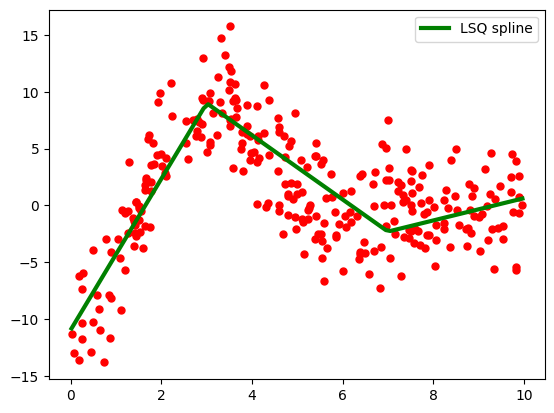

In [7]:
xs = np.linspace(x[0], x[-1], 100)
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
plt.legend(loc='best')
plt.show()

# Question 2

In [8]:
# spl = scipy.interpolate.make_lsq_spline(x, y, knots, degree)
# spl.c

In [9]:
knots = [5.]
n = 5 # (1, x, x^2, x^3, (x-knot)^3+)

X_function = lambda z: np.stack((np.ones((len(z))), z, z**2, z**3, np.minimum(z-knots[0], 0)**3), axis=1)

X = X_function(x)

In [10]:
coeffs = scipy.linalg.inv(X.T @ X) @ (X.T @ y)
spl = lambda z: X_function(z) @ coeffs

spots = np.r_[x[0], knots, x[-1]]
spl(spots), coeffs

(array([-17.65145383,   2.49434689,   0.61999891]),
 array([ 2.85910164e+01, -8.07192283e+00,  6.13034042e-01, -8.50325153e-03,
         3.72595655e-01]))

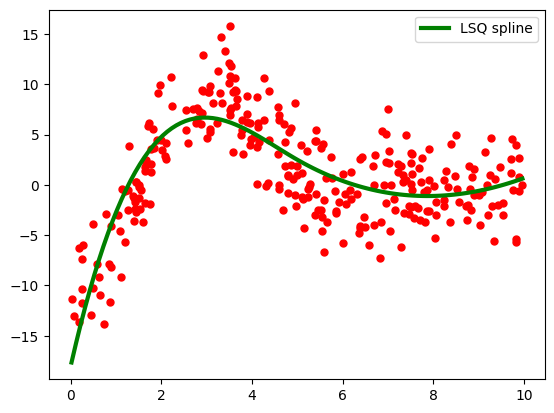

In [11]:
xs = np.linspace(x[0], x[-1], 100)
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
plt.legend(loc='best')
plt.show()

# Question 3

In [12]:
lambdas = [1e-7, 1e-4, 1e-1]
colors = ['g', 'b', 'y']

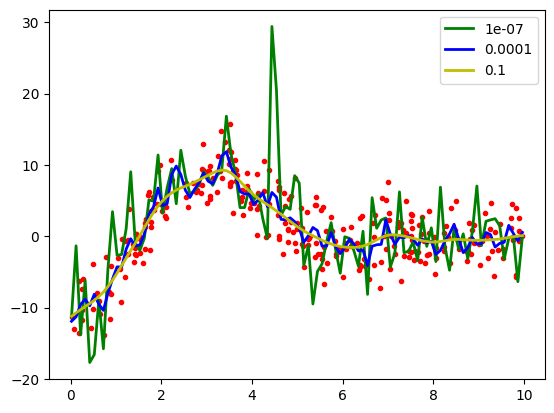

In [13]:
spl = scipy.interpolate.UnivariateSpline(x, y)

xs = np.linspace(x[0], x[-1], 100)
plt.plot(x, y, 'ro', ms=3)
for lam, color in zip(lambdas, colors):
    spl = scipy.interpolate.make_smoothing_spline(x, y, lam=lam)
    plt.plot(xs, spl(xs), color, lw=2, label=lam)

plt.legend(loc='best')

plt.show()



# Question 4

In [14]:
knot = 5
n = 4 # (1, x, (x-knots)-^2, (x-knots)-^3)

X_function = lambda z: np.stack((np.ones((len(z))), z, np.minimum(z-knot, 0)**2, np.minimum(z-knot, 0)**3), axis=1)

X = X_function(x)

In [15]:
coeffs = scipy.linalg.inv(X.T @ X) @ (X.T @ y)
spl = lambda z: X_function(z) @ coeffs

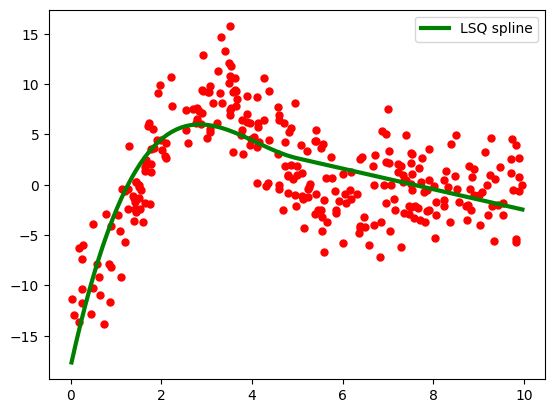

In [16]:
xs = np.linspace(x[0], x[-1], 100)
plt.plot(x, y, 'ro', ms=5)
plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
plt.legend(loc='best')
plt.show()